In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib.gridspec import GridSpec

# Avoid problems with pdfpc and fonts
plt.rc('pdf', fonttype=42)
plt.rc('ps',  fonttype=42)

plt.rcParams['figure.autolayout'] = True

# TODO try to avoid the need of the sys.path.apppend call
import sys
sys.path.append("..")
from cwc.models.density_estimators import MyMultivariateNormal
from cwc.models.density_estimators import MultivariateNormal
from cwc.models.background_check import BackgroundCheck

from scipy.special import logit

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['figure.autolayout'] = True

/home/maikel/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


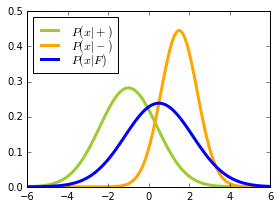

In [2]:
x = np.linspace(-6,6,100).reshape(-1,1)

estimator_lemons = MyMultivariateNormal(mean=[-1], cov=[[2]])
estimator_oranges = MyMultivariateNormal(mean=[1.5], cov=[[.8]])

estimator_foreground = MyMultivariateNormal(mean=[estimator_lemons.means_[0]+estimator_oranges.means_[0]],
                                            cov=[[estimator_lemons.covars_[0]+estimator_oranges.covars_[0]]])
                                                                                
P_X_g_L = estimator_lemons.score(x)
P_X_g_O = estimator_oranges.score(x)
P_X_g_F = estimator_foreground.score(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, P_X_g_L, color='yellowgreen', label='$P(x|+)$', linewidth=3)
ax.plot(x, P_X_g_O, color='orange', label='$P(x|-)$', linewidth=3)
ax.plot(x, P_X_g_F, color='blue', label='$P(x|F)$', linewidth=3)

ax.set_ylim([0,.5])
ax.set_xlim([x.min(), x.max()])
ax.legend(loc='upper left', labelspacing=-0.3)

fig.savefig('bc_fig_density_pos_neg_foreg.pdf')

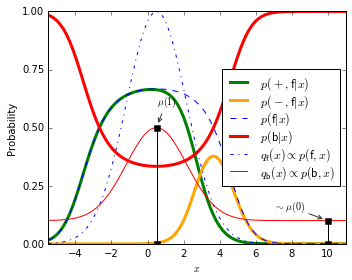

In [3]:
x = np.linspace(-5.5,11,100).reshape(-1,1)

mu=0.5
m=0.1

p_x_and_f = estimator_foreground.score(x)/estimator_foreground.maximum
q = p_x_and_f
p_x_and_b = q * mu + (1.0 - q) * m

P_L = 0.4
P_O = 0.6

P_X = P_X_g_L*P_L + P_X_g_O*P_O

P_L_g_X = P_X_g_L*P_L/P_X
P_O_g_X = P_X_g_O*P_O/P_X

P_B_g_X = p_x_and_b/(q+p_x_and_b)
P_F_g_X = q/(q+p_x_and_b)

P_L_F_g_X = P_L_g_X*P_F_g_X
P_O_F_g_X = P_O_g_X*P_F_g_X

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

ax.plot(x, P_L_F_g_X, color='green', label='$p(+,\mathsf{f}|x)$', linewidth=3)
ax.plot(x, P_O_F_g_X, color='orange', label='$p(-,\mathsf{f}|x)$', linewidth=3)
ax.plot(x, P_F_g_X, '--', color='blue', label='$p(\mathsf{f}|x)$', linewidth=1)
ax.plot(x, P_B_g_X, '-', color='red', label='$p(\mathsf{b}|x)$', linewidth=3)
ax.set_xlabel('$x$')
ax.set_ylabel('Probability')

ax.plot(x, q, '-.', color='blue', label='$q_\mathsf{f}(x) \propto p(\mathsf{f},x)$')
ax.plot(x, p_x_and_b, '-', color='red', label='$q_\mathsf{b}(x) \propto p(\mathsf{b},x)$')
#ax.set_ylim([0,1])
ax.set_xlim([x.min(), x.max()])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.legend(loc='center right', labelspacing=0)

ax.plot([10,10], [0,m], 'ks-')
ax.annotate('$\sim \mu(0)$', xy=(10,m), xytext=(7,m+0.05),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )
center = estimator_foreground.mu[0]
ax.plot([center, center], [0,mu], 'ks-')
ax.annotate('$\mu(1)$', xy=(center,mu), xytext=(center,mu+0.1),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )

fig.savefig('check_your_background_fig_3.pdf')

## 6 pages version

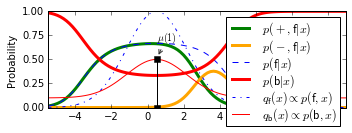

In [4]:
x = np.linspace(-5.5,11,100).reshape(-1,1)

mu=0.5
m=0.1

p_x_and_f = estimator_foreground.score(x)/estimator_foreground.maximum
q = p_x_and_f
p_x_and_b = q * mu + (1.0 - q) * m

P_L = 0.4
P_O = 0.6

P_X = P_X_g_L*P_L + P_X_g_O*P_O

P_L_g_X = P_X_g_L*P_L/P_X
P_O_g_X = P_X_g_O*P_O/P_X

P_B_g_X = p_x_and_b/(q+p_x_and_b)
P_F_g_X = q/(q+p_x_and_b)

P_L_F_g_X = P_L_g_X*P_F_g_X
P_O_F_g_X = P_O_g_X*P_F_g_X

fig = plt.figure(figsize=(5,1.9))
ax = fig.add_subplot(111)

ax.plot(x, P_L_F_g_X, color='green', label='$p(+,\mathsf{f}|x)$', linewidth=3)
ax.plot(x, P_O_F_g_X, color='orange', label='$p(-,\mathsf{f}|x)$', linewidth=3)
ax.plot(x, P_F_g_X, '--', color='blue', label='$p(\mathsf{f}|x)$', linewidth=1)
ax.plot(x, P_B_g_X, '-', color='red', label='$p(\mathsf{b}|x)$', linewidth=3)
#ax.set_xlabel('$x$')
ax.set_ylabel('Probability')

ax.plot(x, q, '-.', color='blue', label='$q_\mathsf{f}(x) \propto p(\mathsf{f},x)$')
ax.plot(x, p_x_and_b, '-', color='red', label='$q_\mathsf{b}(x) \propto p(\mathsf{b},x)$')
#ax.set_ylim([0,1])
ax.set_xlim([x.min(), x.max()])
#ax.set_xticks([])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.legend(loc='upper right', labelspacing=-0.05, frameon=True, borderpad=0.2, fontsize=12)

ax.plot([10,10], [0,m], 'ks-')
ax.annotate('$\sim \mu(0)$', xy=(10,m), xytext=(7,m+0.03),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )
center = estimator_foreground.mu[0]
ax.plot([center, center], [0,mu], 'ks-')
ax.annotate('$\mu(1)$', xy=(center,mu), xytext=(center,mu+0.2),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )

fig.savefig('check_your_background_fig_3.pdf')

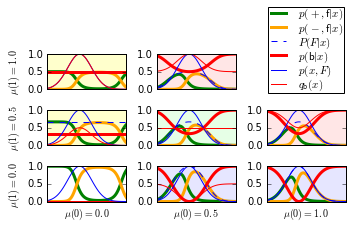

In [5]:
%precision 1
x = np.linspace(-4,7,100).reshape(-1,1)
                                                                                
P_X_g_L = estimator_lemons.score(x)
P_X_g_O = estimator_oranges.score(x)

from matplotlib.gridspec import GridSpec
plt.rcParams['figure.autolayout'] = True

n_values = 3
values = np.linspace(0,1,n_values)

paint_background = True
fig = plt.figure(figsize=(5,2.7))
plt.subplot(n_values, n_values, 1)
for i, mu in enumerate(reversed(values)):
    for j, m in enumerate(values):
        estimator_foreground = MyMultivariateNormal(mean=[estimator_lemons.means_[0]+estimator_oranges.means_[0]],
                                            cov=[[estimator_lemons.covars_[0]+estimator_oranges.covars_[0]]])

        p_x_and_f = estimator_foreground.score(x)/estimator_foreground.maximum
        q = p_x_and_f
        p_x_and_b = q * mu + (1.0 - q) * m
        
        P_X = P_X_g_L*P_L + P_X_g_O*P_O

        P_L_g_X = P_X_g_L*P_L/P_X
        P_O_g_X = P_X_g_O*P_O/P_X

        P_B_g_X = p_x_and_b/(q+p_x_and_b)
        P_F_g_X = q/(q+p_x_and_b)

        P_L_F_g_X = P_L_g_X*P_F_g_X
        P_O_F_g_X = P_O_g_X*P_F_g_X

        if i == 0 and j == (n_values-1):
            ax = plt.legend(bbox_to_anchor=(1.4, -0.1), loc='lower left', borderaxespad=0., labelspacing=-0.1, borderpad=0, fontsize=11)
        else:
            ax = plt.subplot(n_values, n_values, i*n_values+j+1)
            ax.plot(x, P_L_F_g_X, '-', color='green', label='$p(+,\mathsf{f}|x)$', linewidth=3)
            ax.plot(x, P_O_F_g_X, '-', color='orange', label='$p(-,\mathsf{f}|x)$', linewidth=3)
            ax.plot(x, P_F_g_X, '--', color='blue', label='$P(F|x)$', linewidth=1)
            ax.plot(x, P_B_g_X, '-', color='red', label='$p(\mathsf{b}|x)$', linewidth=3)

            ax.plot(x, q, '-', color='blue', label='$p(x,F)$')
            ax.plot(x, p_x_and_b, '-', color='red', label='$q_\mathsf{b}(x)$')
            ax.set_ylim([0,1])
            ax.set_yticks([0,0.5,1])
            ax.set_xlim([x.min(),x.max()])
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off') # labels along the bottom edge are off
        
        if i == n_values-1:
            ax.set_xlabel('$\mu(0) = {:.1f}$'.format(m))
        if j == 0:
            ax.set_ylabel('$\mu(1) = {:.1f}$'.format(mu))
        
        if paint_background:
            if i == n_values-1:
                ax.set_axis_bgcolor((.9,.9,1))

            if j == 0:
                ax.set_axis_bgcolor((1,1,.8))

            if i == (n_values-1) and j == 0:
                ax.set_axis_bgcolor((1,1,1))
            elif (i != (n_values-1) and j != 0) and not (i == 0 and j == (n_values-1)):
                if (n_values-i-1) == j:
                    ax.set_axis_bgcolor((0.9,1,0.9))
                elif i == 0:
                    #ax.set_axis_bgcolor((.8,.8,.8))
                    ax.set_axis_bgcolor((1,.9,.9))
                else:
                    ax.set_axis_bgcolor((1,.9,.9))

            
fig.savefig('check_your_background_fig_4.pdf')

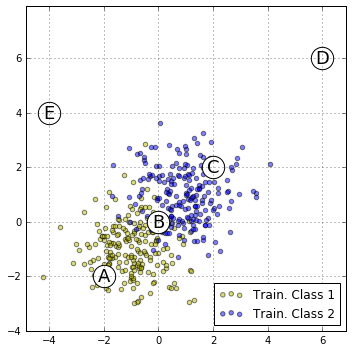

In [83]:
np.random.seed(42)

N = 200*2
x = np.concatenate((np.random.randn(int(N/2),2)-1,
                    np.random.randn(int(N/2),2)+1))
y = np.concatenate((np.zeros(int(N/2)),
                    np.ones(int(N/2))))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x[y==0,0], x[y==0,1], c='y', alpha=0.5, label='Train. Class 1')
ax.scatter(x[y==1,0], x[y==1,1], c='b', alpha=0.5, label='Train. Class 2')
ax.grid(True)

def ax_scatter_question(ax, x, notes):
    ax.scatter(x[:,0], x[:,1], c='w', s=500)

    for point, n in zip(x, notes):
        ax.annotate('{}'.format(n), xy=(point[0],point[1]), xytext=(point[0],point[1]),
                    ha="center", va="center", size=18)
        
ax.legend(loc='lower right')


x_predict = np.array([[-2,-2], [0,0], [2,2], [6,6], [-4,4]])
notes = ('A', 'B', 'C', 'D', 'E')

ax_scatter_question(ax, x_predict, notes)
plt.axis('equal')

x1_min, x1_max = (-5.0, 7.0)
x2_min, x2_max = (-4.0, 7.9)

plt.xlim([x1_min, x1_max])
plt.ylim([x2_min, x2_max])
fig.savefig('bc_fig_motiv.pdf')

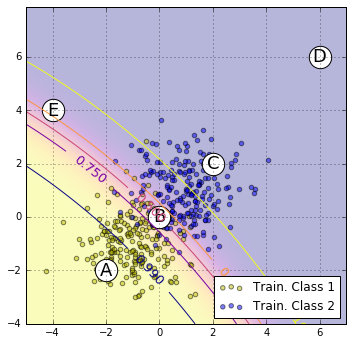

In [84]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.cm as cm
    
def plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict=None, notes=None, cmap=cm.plasma_r, cmap_r=cm.plasma, loc='lower right'):
    x1_min, x1_max = MX1.min(), MX1.max()
    x2_min, x2_max = MX2.min(), MX2.max()
    
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x[y==0,0], x[y==0,1], c='y', alpha=0.5, label='Train. Class 1')
    ax.scatter(x[y==1,0], x[y==1,1], c='b', alpha=0.5, label='Train. Class 2')
    ax.grid(True)

    # Colormap
    im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                   cmap=cmap_r, extent=(x1_min, x1_max, x2_min, x2_max),
                   alpha=0.3)

    # Contour
    CS = ax.contour(MX1, MX2, Z, levels=[0.01, 0.25, 0.5, 0.75, 0.99], cmap=cmap)
    ax.clabel(CS, fontsize=13, inline=1)
    ax.set_xlim([x1_min,x1_max])
    ax.set_ylim([x2_min,x2_max])
    
    if x_predict is not None:
        ax_scatter_question(ax, x_predict, notes)
    ax.legend(loc=loc)

delta = 0.025
x1_grid = np.arange(x1_min, x1_max, delta)
x2_grid = np.arange(x2_min, x2_max, delta)
MX1, MX2 = np.meshgrid(x1_grid, x2_grid)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

clf = GaussianNB()
clf.fit(x,y)

prediction = clf.predict_proba(x_grid)

Z = prediction[:,0].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict, notes)
fig.savefig('bc_fig_motiv_nb_gaus_contour.pdf')

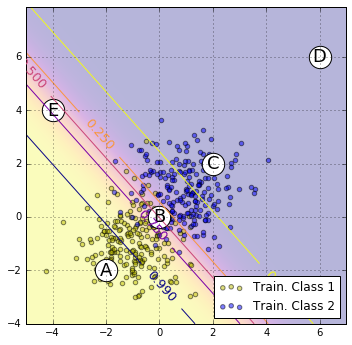

In [85]:
from sklearn.linear_model import LogisticRegression
import matplotlib.cm as cm

clf = LogisticRegression()
clf.fit(x,y)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

prediction = clf.predict_proba(x_grid)

Z = prediction[:,0].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict, notes)
fig.savefig('bc_fig_motiv_lr_contour.pdf')

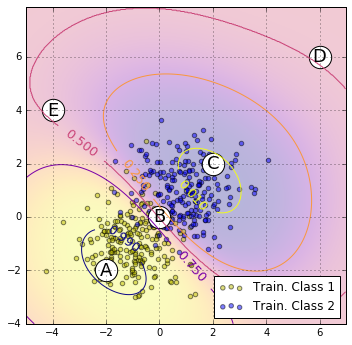

In [86]:
from sklearn.svm import SVC
import matplotlib.cm as cm

clf = SVC(kernel='rbf', C=0.32, gamma=0.1, probability=True)
# clf = SVC(kernel='rbf', C=1.0, gamma=0.1, probability=True) # perfect for D = 0.5
clf.fit(x,y)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

prediction = clf.predict_proba(x_grid)

Z = prediction[:,0].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict, notes)
fig.savefig('bc_fig_motiv_svc_rbf_contour_platt.pdf')

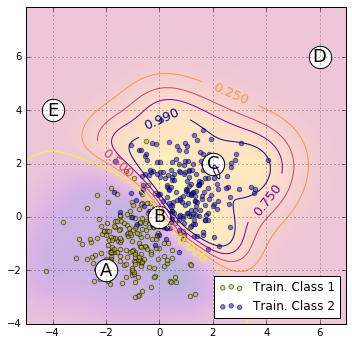

In [87]:
from sklearn.svm import SVC
import matplotlib.cm as cm

clf = SVC(kernel='rbf', probability=False)
clf.fit(x,y)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

prediction = clf.decision_function(x_grid)

Z = prediction.reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict, notes)
fig.savefig('bc_fig_motiv_svc_rbf_contour.pdf')

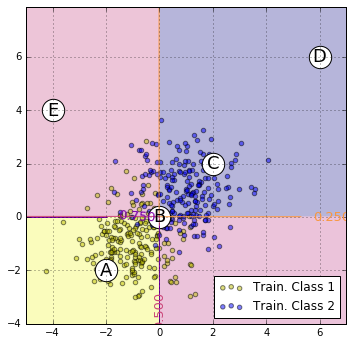

In [88]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x,y)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

prediction = clf.predict_proba(x_grid)

Z = prediction[:,0].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, x_predict, notes)
fig.savefig('bc_fig_motiv_nb_bern_contour.pdf')

(228480, 2)
(480,)


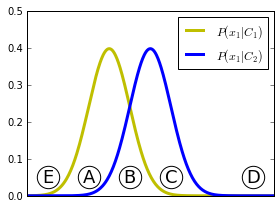

In [118]:
estimator_a = MyMultivariateNormal(mean=[-1], cov=[[1]])
estimator_b = MyMultivariateNormal(mean=[1], cov=[[1]])

p_a = estimator_a.score(x1_grid.reshape(-1,1))
p_b = estimator_b.score(x1_grid.reshape(-1,1))

fig = plt.figure()
ax = fig.add_subplot(111)
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_a, color='y', label='$P(x_1|C_1)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_b, color='b', label='$P(x_1|C_2)$', linewidth=3)

ax.set_ylim([0,.5])
ax.set_xlim([x1_min, x1_max])
ax.set_xticks([])
ax.legend(loc='upper right')

x1_predict = np.array([[x1, 0.05] for x1, x2 in x_predict])
ax_scatter_question(ax, x1_predict, notes)

fig.savefig('bc_fig_density_a_b.pdf')

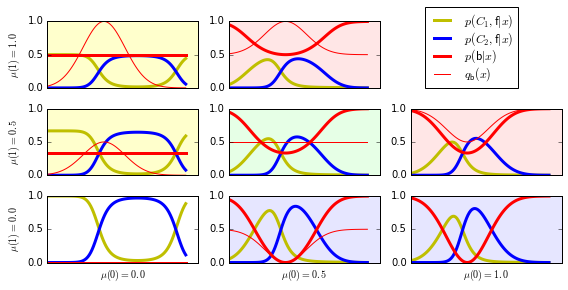

In [90]:
%precision 1
x = np.linspace(-4,7,100).reshape(-1,1)
                                                                                
P_X_g_L = estimator_lemons.score(x)
P_X_g_O = estimator_oranges.score(x)

from matplotlib.gridspec import GridSpec
plt.rcParams['figure.autolayout'] = True

n_values = 3
values = np.linspace(0,1,n_values)

paint_background = True
fig = plt.figure(figsize=(8,4))
plt.subplot(n_values, n_values, 1)
for i, mu in enumerate(reversed(values)):
    for j, m in enumerate(values):
        estimator_foreground = MyMultivariateNormal(mean=[estimator_lemons.means_[0]+estimator_oranges.means_[0]],
                                            cov=[[estimator_lemons.covars_[0]+estimator_oranges.covars_[0]]])

        p_x_and_f = estimator_foreground.score(x)/estimator_foreground.maximum
        q = p_x_and_f
        p_x_and_b = q * mu + (1.0 - q) * m
        
        P_X = P_X_g_L*P_L + P_X_g_O*P_O

        P_L_g_X = P_X_g_L*P_L/P_X
        P_O_g_X = P_X_g_O*P_O/P_X

        P_B_g_X = p_x_and_b/(q+p_x_and_b)
        P_F_g_X = q/(q+p_x_and_b)

        P_L_F_g_X = P_L_g_X*P_F_g_X
        P_O_F_g_X = P_O_g_X*P_F_g_X

        if i == 0 and j == (n_values-1):
            ax = plt.legend(bbox_to_anchor=(1.3, 0), loc='lower left', borderaxespad=0., labelspacing=0)
        else:
            ax = plt.subplot(n_values, n_values, i*n_values+j+1)
            ax.plot(x, P_L_F_g_X, '-', color='y', label='$p(C_1,\mathsf{f}|x)$', linewidth=3)
            ax.plot(x, P_O_F_g_X, '-', color='b', label='$p(C_2,\mathsf{f}|x)$', linewidth=3)
            #ax.plot(x, P_F_g_X, '--', color='blue', label='$P(F|x)$', linewidth=1)
            ax.plot(x, P_B_g_X, '-', color='red', label='$p(\mathsf{b}|x)$', linewidth=3)

            #ax.plot(x, q, '-', color='blue', label='$p(x,F)$')
            ax.plot(x, p_x_and_b, '-', color='red', label='$q_\mathsf{b}(x)$')
            ax.set_ylim([0,1])
            ax.set_yticks([0,0.5,1])
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off') # labels along the bottom edge are off
        
        if i == n_values-1:
            ax.set_xlabel('$\mu(0) = {:.1f}$'.format(m))
        if j == 0:
            ax.set_ylabel('$\mu(1) = {:.1f}$'.format(mu))
        
        if paint_background:
            if i == n_values-1:
                ax.set_axis_bgcolor((.9,.9,1))

            if j == 0:
                ax.set_axis_bgcolor((1,1,.8))

            if i == (n_values-1) and j == 0:
                ax.set_axis_bgcolor((1,1,1))
            elif (i != (n_values-1) and j != 0) and not (i == 0 and j == (n_values-1)):
                if (n_values-i-1) == j:
                    ax.set_axis_bgcolor((0.9,1,0.9))
                elif i == 0:
                    #ax.set_axis_bgcolor((.8,.8,.8))
                    ax.set_axis_bgcolor((1,.9,.9))
                else:
                    ax.set_axis_bgcolor((1,.9,.9))

            
fig.savefig('bc_fig_affine_back_bias.pdf')

(228480, 2)
(480,)


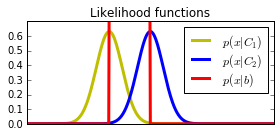

In [135]:
estimator_f1 = MyMultivariateNormal(mean=[-1], cov=[[0.4]])
estimator_f2 = MyMultivariateNormal(mean=[1], cov=[[0.4]])

class MyUniformDistribution(object):
    def __init__(self, mean=[0], base=1):
        self.mean = mean
        self.d = len(mean)
        self.base = base
        
    def score(self, x):
        return np.array(np.abs(x-self.mean) <= self.base, dtype='int')
        
estimator_b = MyUniformDistribution(mean=[0], base=1)

p_f1 = estimator_f1.score(x1_grid.reshape(-1,1))
p_f2 = estimator_f2.score(x1_grid.reshape(-1,1))

p_b = estimator_b.score(x1_grid.reshape(-1,1))

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Likelihood functions')
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f1, color='y', label='$p(x|C_1)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2, color='b', label='$p(x|C_2)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_b, color='r', label='$p(x|b)$', linewidth=3)

ax.set_ylim([0,.7])
ax.set_xlim([x1_min, x1_max])
ax.set_xticks([])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_density_f1_f2_b.pdf')

(228480, 2)
(480,)


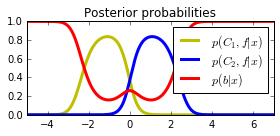

In [131]:
p_f1_g_x = p_f1/(p_f1+p_f2+p_b)
p_f2_g_x = p_f2/(p_f1+p_f2+p_b)
p_b_g_x = p_b/(p_f1+p_f2+p_b)

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Posterior probabilities')
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f1_g_x, color='y', label='$p(C_1,f|x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2_g_x, color='b', label='$p(C_2,f|x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_b_g_x, color='r', label='$p(b|x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_f1_f2_b.pdf')

(228480, 2)
(480,)


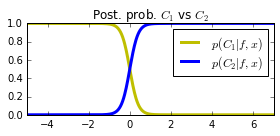

In [128]:
p_f1_g_f_x = p_f1/(p_f1+p_f2)
p_f2_g_f_x = p_f2/(p_f1+p_f2)

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Post. prob. $C_1$ vs $C_2$')
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f1_g_f_x, color='y', label='$p(C_1|f,x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2_g_f_x, color='b', label='$p(C_2|f,x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_f1_f2_g_f_x.pdf')

(228480, 2)
(480,)


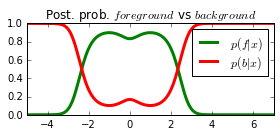

In [129]:
p_f_g_x = (p_f1+p_f2)/(p_f1+p_f2+p_b)
p_b_g_x = p_b/(p_f1+p_f2+p_b)

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Post. prob. $foreground$ vs $background$')
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f_g_x, color='g', label='$p(f|x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_b_g_x, color='r', label='$p(b|x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_f_b_g_x.pdf')

(228480, 2)
(480,)


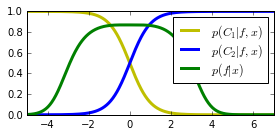

In [96]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f1_g_f_x, color='y', label='$p(C_1|f,x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2_g_f_x, color='b', label='$p(C_2|f,x)$', linewidth=3)

ax.plot(x1_grid.reshape(-1,1), p_f_g_x, color='g', label='$p(f|x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_f1_f2_f_g_f_x.pdf')

(228480, 2)
(480,)


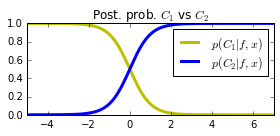

In [97]:
p_f1_g_f_x = p_f1/(p_f1+p_f2)
p_f2_g_f_x = p_f2/(p_f1+p_f2)

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Post. prob. $C_1$ vs $C_2$')
print x_grid.shape
print p_a.shape
ax.plot(x1_grid.reshape(-1,1), p_f1_g_f_x, color='y', label='$p(C_1|f,x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2_g_f_x, color='b', label='$p(C_2|f,x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_classifier.pdf')

(228480, 2)


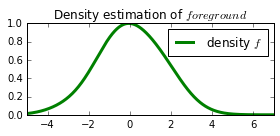

In [98]:
from sklearn.neighbors import KernelDensity

x = np.vstack((estimator_f1.sample(100), estimator_f2.sample(100)))

kde = KernelDensity()
kde.fit(x)

x_g_f = np.exp(kde.score_samples(x1_grid.reshape(-1,1)))
x_g_f = x_g_f/x_g_f.max()

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title(r'Density estimation of $foreground$')
print x_grid.shape
ax.plot(x1_grid.reshape(-1,1), x_g_f, color='g', label='density $f$', linewidth=3)

#ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
plt.locator_params(axis='y',nbins=5)
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_density_foreground.pdf')

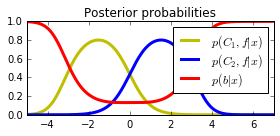

In [99]:
p_f1_g_x = p_f1/(p_f1+p_f2+p_b)
p_f2_g_x = p_f2/(p_f1+p_f2+p_b)
p_b_g_x = p_b/(p_f1+p_f2+p_b)

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.set_title('Posterior probabilities')
ax.plot(x1_grid.reshape(-1,1), p_f1_g_x, color='y', label='$p(C_1,f|x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_f2_g_x, color='b', label='$p(C_2,f|x)$', linewidth=3)
ax.plot(x1_grid.reshape(-1,1), p_b_g_x, color='r', label='$p(b|x)$', linewidth=3)

ax.set_ylim([0,1])
ax.set_xlim([x1_min, x1_max])
ax.legend(loc='upper right', labelspacing=0.1)

fig.savefig('bc_fig_posterior_f1_f2_b_g_x.pdf')

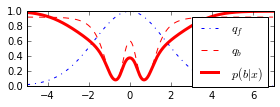

In [100]:
norm_f = MyMultivariateNormal(mean=[0], cov=[[3]])

q_f = norm_f.score(x1_grid.reshape(-1,1))
q_f /= max(q_f)
q_b = (np.sin(np.cos(np.tan(q_f*1.37)))+1)/2

fig = plt.figure(figsize=(4,1.6))
ax = fig.add_subplot(111)
ax.plot(x1_grid, q_f, '-.', color='blue', label='$q_f$', linewidth=1)
ax.plot(x1_grid, q_b, '--', color='red', label='$q_b$', linewidth=1)
ax.plot(x1_grid, 1/(1+(q_f/q_b)), '-', color='red', label='$p(b|x)$', linewidth=3)

ax.set_xlim([x1_min, x1_max])
ax.legend()

fig.savefig('bc_fig_bias_1.pdf')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


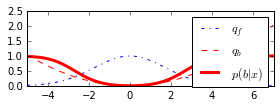

In [101]:
norm_f = MyMultivariateNormal(mean=[0], cov=[[3]])

q_f = norm_f.score(x1_grid.reshape(-1,1))
q_f /= max(q_f)
q_b = -np.log(q_f)/4.0

fig = plt.figure(figsize=(4,1.6))
ax = fig.add_subplot(111)
ax.plot(x1_grid, q_f, '-.', color='blue', label='$q_f$', linewidth=1)
ax.plot(x1_grid, q_b, '--', color='red', label='$q_b$', linewidth=1)
ax.plot(x1_grid, 1/(1+(q_f/q_b)), '-', color='red', label='$p(b|x)$', linewidth=3)

ax.set_xlim([x1_min, x1_max])
ax.legend()

fig.savefig('bc_fig_bias_2.pdf')

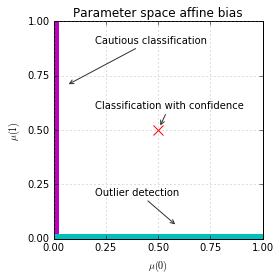

In [136]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_title('Parameter space affine bias')
ax.plot([])
ax.set_ylabel('$\mu(1)$')
ax.set_xlabel('$\mu(0)$')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid(True, color='gray')
ticks = ax.set_xticks([0,0.25,0.5,0.75,1.0])
ticks = ax.set_yticks([0,0.25,0.5,0.75,1.0])

fig.savefig('bc_fig_bias_3_empty.pdf')

ax.plot([0,0], [0,1], 'm-', lw=10)
ax.annotate('Cautious classification', xy=(0.05, 0.7), xytext=(0.2, 0.9),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )
fig.savefig('bc_fig_bias_3_cautious_class.pdf')

ax.plot([0,1], [0,0], 'c-', lw=10)
ax.annotate('Outlier detection', xy=(0.6, 0.05), xytext=(0.2, 0.2),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )
fig.savefig('bc_fig_bias_3_outlier_detection.pdf')

ax.scatter([0.5], [0.5], color='red', marker='x', s=100)
ax.annotate('Classification with confidence', xy=(0.5, 0.5), xytext=(0.2, 0.6),
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.2",
                                shrinkA=2, shrinkB=5,),
            )
fig.savefig('bc_fig_bias_3_class_confidence.pdf')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide


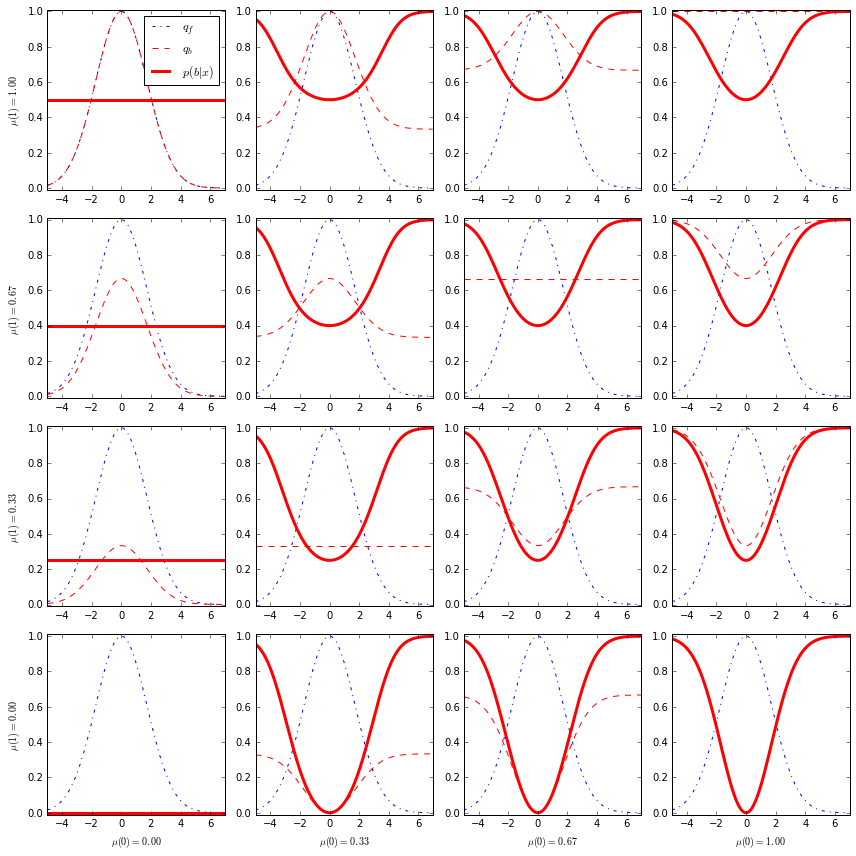

In [103]:
fig = plt.figure(figsize=(12,12))

n_values = 4
values = np.linspace(0,1,n_values)
for i, mu1 in enumerate(reversed(values)):
    for j, mu0 in enumerate(values):
        plt.subplot(n_values, n_values, i*n_values+j+1)
        q_b = (1-q_f)*mu0 + q_f*mu1

        plt.plot(x1_grid, q_f, '-.', color='blue', label='$q_f$', linewidth=1)
        plt.plot(x1_grid, q_b, '--', color='red', label='$q_b$', linewidth=1)
        plt.plot(x1_grid, 1/(1+q_f/q_b), '-', color='red', label='$p(b|x)$', linewidth=3)
        
        plt.xlim([x1_min, x1_max])
        plt.ylim([-0.01,1.01])

        #plt.rc('grid', linestyle="-", color='#AAAAAA')
        #plt.grid(True)
        
        if i==0 and j==0:
            plt.legend()
        
        if i == n_values-1:
            plt.xlabel('$\mu(0) = {:.2f}$'.format(mu0))
        if j == 0:
            plt.ylabel('$\mu(1) = {:.2f}$'.format(mu1))

ValueError: operands could not be broadcast together with shapes (100,) (200,) 

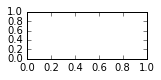

In [104]:
paint_background = True
fig = plt.figure(figsize=(8,4))
plt.subplot(n_values, n_values, 1)
for i, mu in enumerate(reversed(values)):
    for j, m in enumerate(values):
        estimator_foreground = MyMultivariateNormal(mean=[estimator_lemons.means_[0]+estimator_oranges.means_[0]],
                                            cov=[[estimator_lemons.covars_[0]+estimator_oranges.covars_[0]]])

        p_x_and_f = estimator_foreground.score(x)/estimator_foreground.maximum
        q = p_x_and_f
        p_x_and_b = q * mu + (1.0 - q) * m
        
        P_X = P_X_g_L*P_L + P_X_g_O*P_O

        P_L_g_X = P_X_g_L*P_L/P_X
        P_O_g_X = P_X_g_O*P_O/P_X

        P_B_g_X = p_x_and_b/(q+p_x_and_b)
        P_F_g_X = q/(q+p_x_and_b)

        P_L_F_g_X = P_L_g_X*P_F_g_X
        P_O_F_g_X = P_O_g_X*P_F_g_X

        if i == 0 and j == (n_values-1):
            ax = plt.legend(bbox_to_anchor=(1.3, 0), loc='lower left', borderaxespad=0., labelspacing=0)
        else:
            ax = plt.subplot(n_values, n_values, i*n_values+j+1)
            ax.plot(x, P_L_F_g_X, '-', color='y', label='$p(f_1,\mathsf{f}|x)$', linewidth=3)
            ax.plot(x, P_O_F_g_X, '-', color='b', label='$p(f_2,\mathsf{f}|x)$', linewidth=3)
            #ax.plot(x, P_F_g_X, '--', color='blue', label='$P(F|x)$', linewidth=1)
            ax.plot(x, P_B_g_X, '-', color='red', label='$p(\mathsf{b}|x)$', linewidth=3)

            #ax.plot(x, q, '-', color='blue', label='$p(x,F)$')
            ax.plot(x, p_x_and_b, '-', color='red', label='$q_\mathsf{b}(x)$')
            ax.set_ylim([0,1])
            ax.set_yticks([0,0.5,1])
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off') # labels along the bottom edge are off
        
        if i == n_values-1:
            ax.set_xlabel('$\mu(0) = {:.1f}$'.format(m))
        if j == 0:
            ax.set_ylabel('$\mu(1) = {:.1f}$'.format(mu))
        
        if paint_background:
            if i == n_values-1:
                ax.set_axis_bgcolor((.9,.9,1))

            if j == 0:
                ax.set_axis_bgcolor((1,1,.8))

            if i == (n_values-1) and j == 0:
                ax.set_axis_bgcolor((1,1,1))
            elif (i != (n_values-1) and j != 0) and not (i == 0 and j == (n_values-1)):
                if (n_values-i-1) == j:
                    ax.set_axis_bgcolor((0.9,1,0.9))
                elif i == 0:
                    #ax.set_axis_bgcolor((.8,.8,.8))
                    ax.set_axis_bgcolor((1,.9,.9))
                else:
                    ax.set_axis_bgcolor((1,.9,.9))

            
fig.savefig('bc_fig_bias_3.pdf')

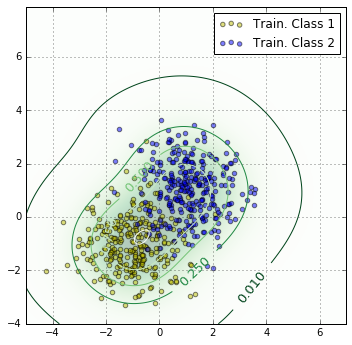

In [105]:
np.random.seed(42)

N = 300*2
x = np.concatenate((np.random.randn(int(N/2),2)-1,
                    np.random.randn(int(N/2),2)+1))
y = np.concatenate((np.zeros(int(N/2)),
                    np.ones(int(N/2))))

from sklearn.neighbors import KernelDensity
kde = KernelDensity()
kde.fit(x)
prediction_x = np.exp(kde.score_samples(x))
prediction = np.exp(kde.score_samples(x_grid))

qf = prediction.reshape(len(x2_grid), len(x1_grid))
z = qf/qf.max()

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, z, MX1, MX2, cmap=cm.Greens_r, cmap_r=cm.Greens, loc='upper right')
fig.savefig('bc_fig_bcf_3_kde.pdf')

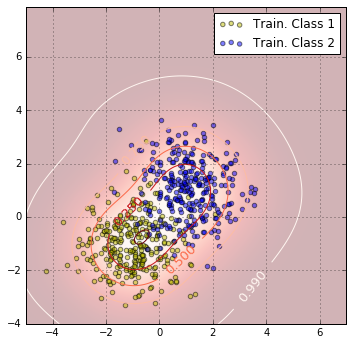

In [106]:
mu0 = 1.0
mu1 = 0.0

pb = (1-z)*mu0 + z*mu1

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, pb, MX1, MX2, cmap=cm.Reds_r, cmap_r=cm.Reds, loc='upper right')
fig.savefig('bc_fig_bcf_4_kde.pdf')

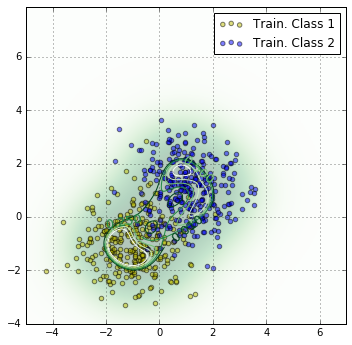

In [107]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM()
prediction_x = clf.fit(x).decision_function(x)
prediction = clf.decision_function(x_grid)

qf = prediction.reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, qf, MX1, MX2, cmap=cm.Greens_r, cmap_r=cm.Greens, loc='upper right')
fig.savefig('bc_fig_bcf_3_svm.pdf')

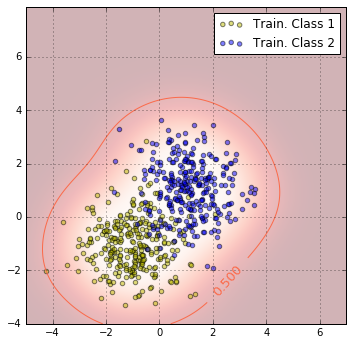

In [108]:
mu0 = 1.0
mu1 = 0.0

def sigmoid(z):
    return 1/(1+np.exp(z/100))

z = prediction_x.min() - qf
pb = (1-sigmoid(z))*mu0 + sigmoid(z)*mu1

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, pb, MX1, MX2, cmap=cm.Reds_r, cmap_r=cm.Reds, loc='upper right')
fig.savefig('bc_fig_bcf_4_svm.pdf')

-43.261863033


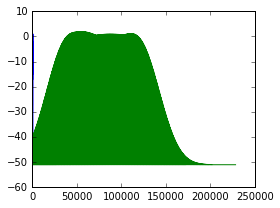

In [109]:
plt.plot(prediction_x)
print prediction_x.min()
plt.plot(qf.flatten())

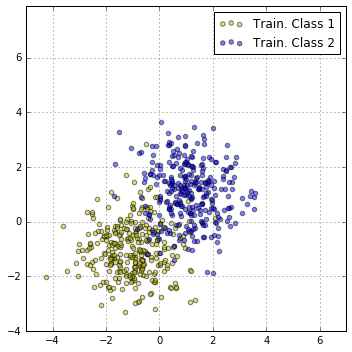

In [110]:
np.random.seed(42)

N = 300*2
x = np.concatenate((np.random.randn(int(N/2),2)-1,
                    np.random.randn(int(N/2),2)+1))
y = np.concatenate((np.zeros(int(N/2)),
                    np.ones(int(N/2))))

def plot_points(fig, x, y, MX1, MX2, x_predict=None, notes=None, loc='upper right'):
    x1_min, x1_max = MX1.min(), MX1.max()
    x2_min, x2_max = MX2.min(), MX2.max()
    
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x[y==0,0], x[y==0,1], c='y', alpha=0.5, label='Train. Class 1')
    ax.scatter(x[y==1,0], x[y==1,1], c='b', alpha=0.5, label='Train. Class 2')
    ax.grid(True)
    ax.legend(loc=loc)
    
    ax.set_xlim([x1_min,x1_max])
    ax.set_ylim([x2_min,x2_max])


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plot_points(fig, x, y, MX1, MX2)

fig.savefig('bc_fig_bcd_1.pdf')
fig.savefig('bc_fig_bcf_1.pdf')

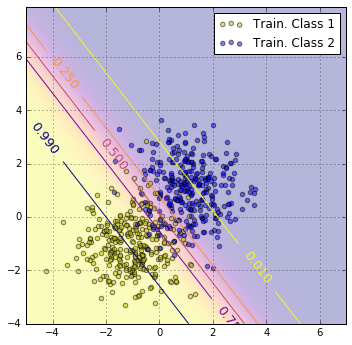

In [111]:
from sklearn.linear_model import LogisticRegression
import matplotlib.cm as cm

clf = LogisticRegression()
clf.fit(x,y)

x_grid = np.asarray([MX1.flatten(),MX2.flatten()]).T

prediction = clf.predict_proba(x_grid)

Z = prediction[:,0].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
plot_points_predictions(fig, x, y, Z, MX1, MX2, loc='upper right')
fig.savefig('bc_fig_bcf_2.pdf')
fig.savefig('bc_fig_bcd_2.pdf')

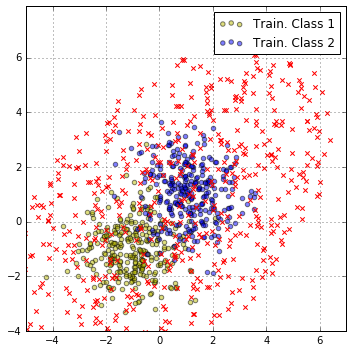

In [112]:
from reject import create_reject_data

b = create_reject_data(x, 1, 'uniform_hsphere', pca=True, pca_components=2, hshape_prop_in=1, hshape_multiplier=1.3)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plot_points(fig, x, y, MX1, MX2)
ax.scatter(b[:,0], b[:,1], marker='x', c='r')

fig.savefig('bc_fig_bcd_3.pdf')

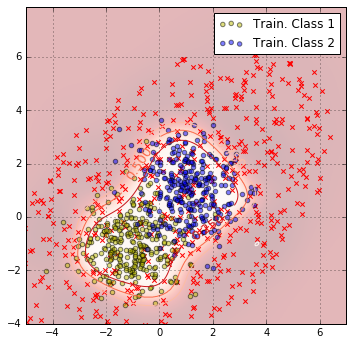

In [113]:
x_b = np.concatenate((x,b))
y_b = np.concatenate((np.zeros(N),
                      np.ones(N)))

clf = SVC(kernel='rbf', probability=True)
clf.fit(x_b, y_b)

prediction = clf.predict_proba(x_grid)

Z = prediction[:,1].reshape(len(x2_grid), len(x1_grid))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(b[:,0], b[:,1], marker='x', c='r')
plot_points_predictions(fig, x, y, Z, MX1, MX2, cmap=cm.Reds_r, cmap_r=cm.Reds, loc='upper right')

fig.savefig('bc_fig_bcd_4.pdf')